<h1 style="color:red">lec 79:- Matplotlib Introduction </h1>

why matplotlib?


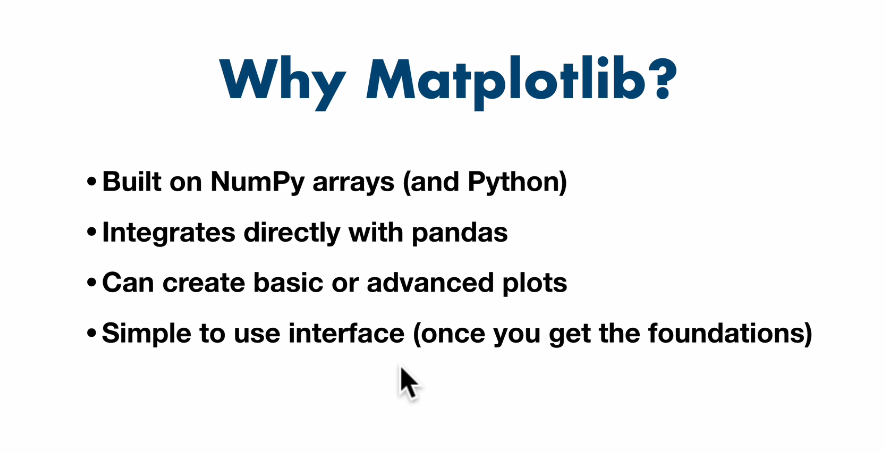

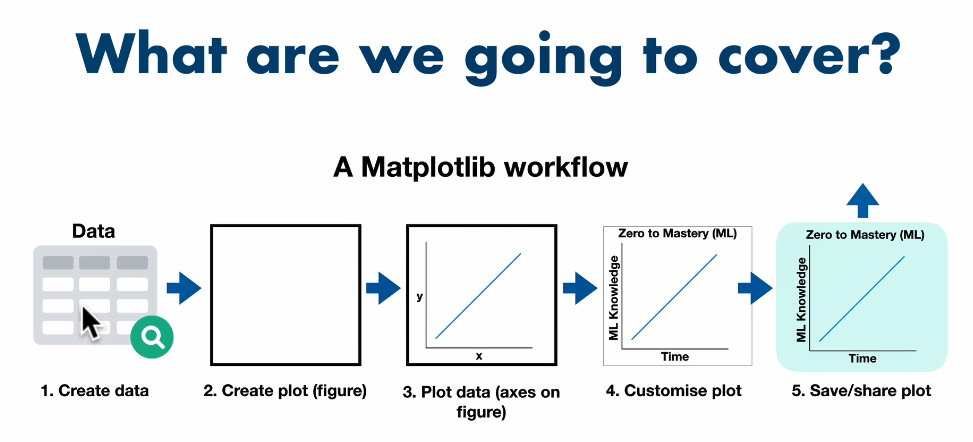

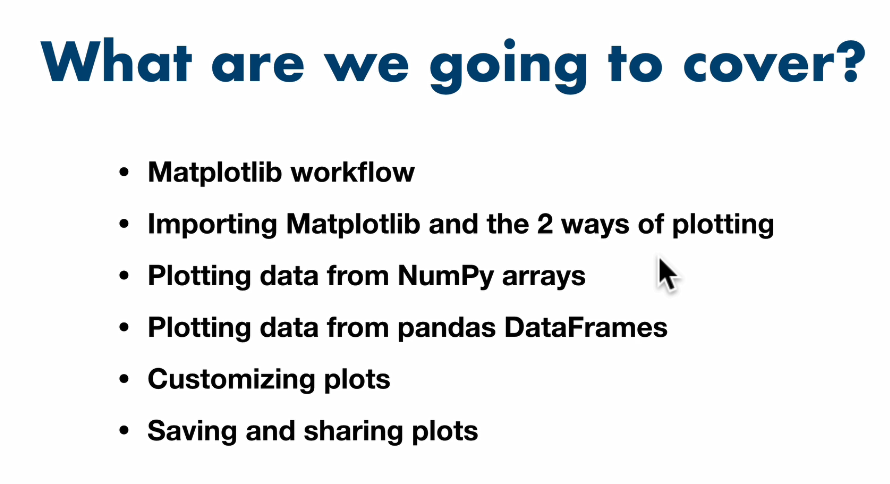

<h1 style="color:red">lec 80:- Importing And using Matplotlib</h1>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

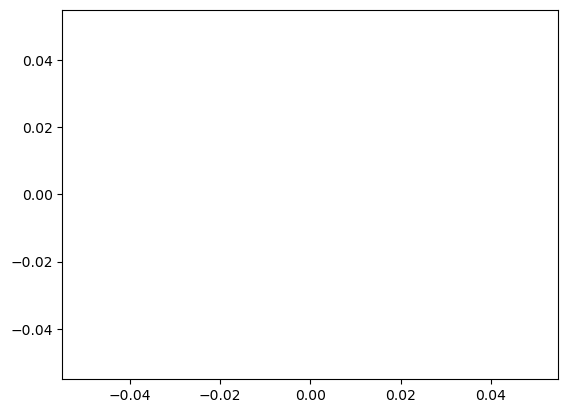

In [4]:
plt.plot();

[]

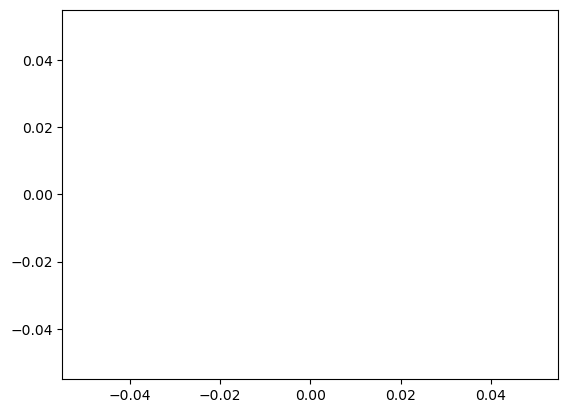

In [5]:
plt.plot()

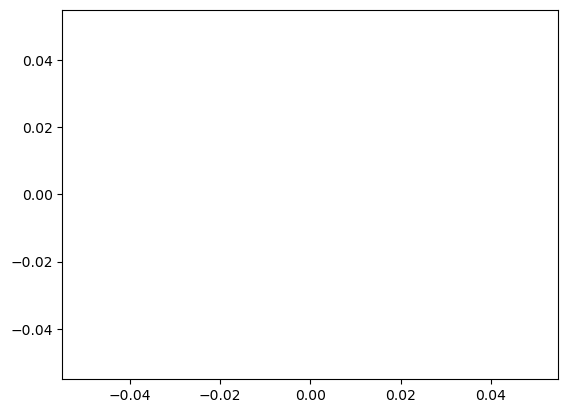

In [6]:
plt.plot() 
plt.show() #same as plt.plot();

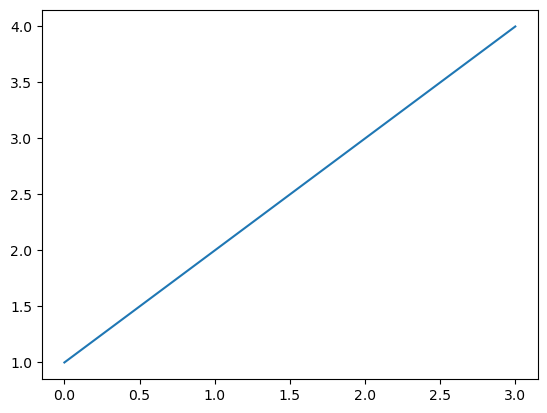

In [7]:
plt.plot([1,2,3,4]); #values of x in first argument

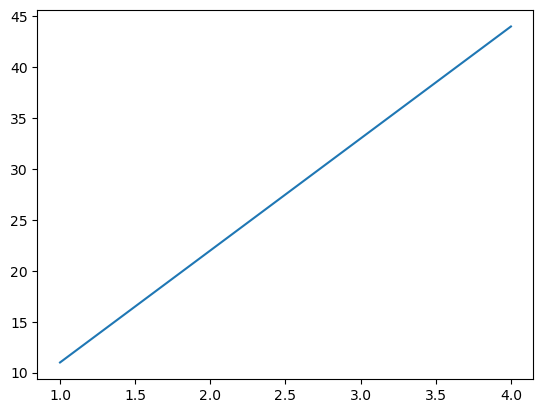

In [8]:
x=[1,2,3,4]
y=[11,22,33,44]
plt.plot(x,y)

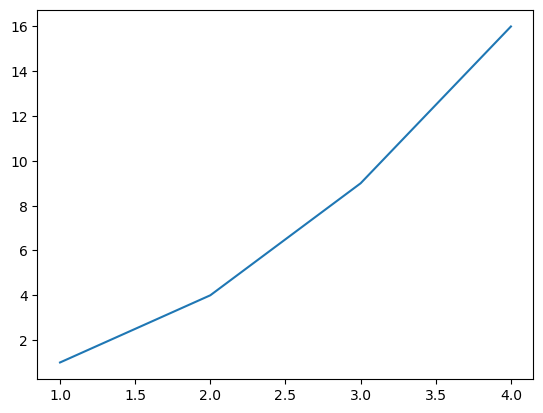

In [9]:
a = [1,2,3,4]
b=[1,4,9,16]
plt.plot(a,b)

In [10]:
#pyplot API is generally less-flexible than the object-oriented api


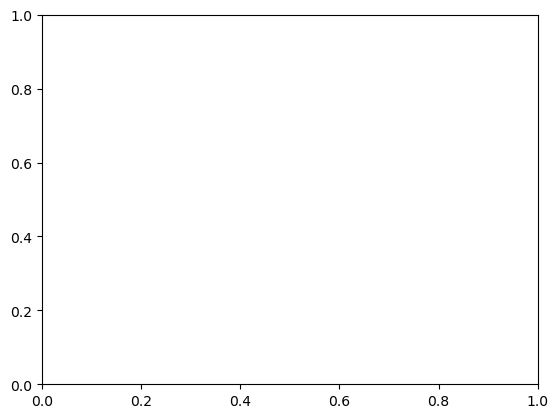

In [11]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot()  #adds some axis    # ax = axix
plt.show()

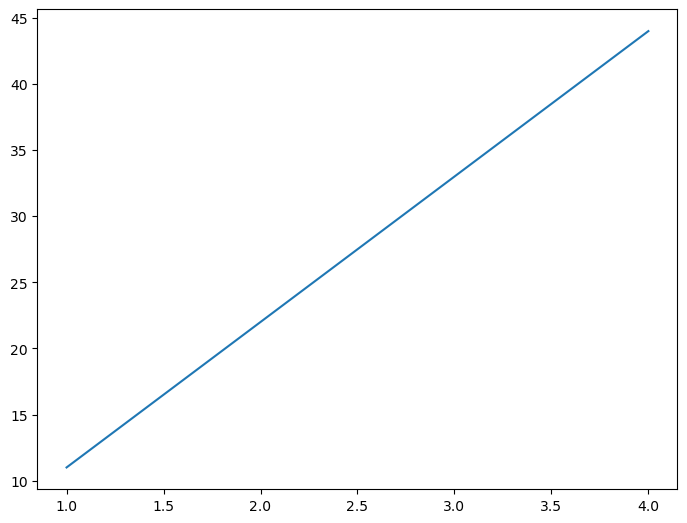

In [12]:
# 2nd method
fig = plt.figure() #creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) #add some data
plt.show()

#plt.figure().add_axes([1,1,1,1]).plot(x,y);

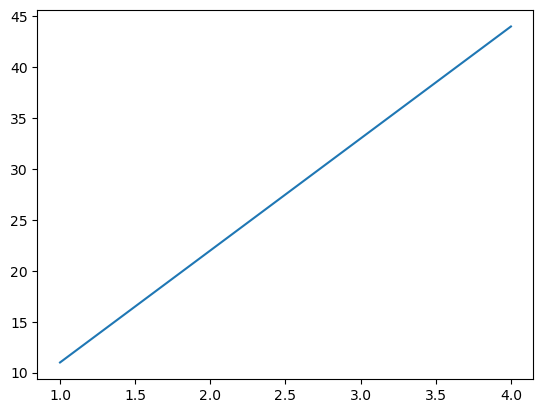

In [14]:
# 3rd method (recomended)
fig, ax = plt.subplots() #every time we call fig it resets the data
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

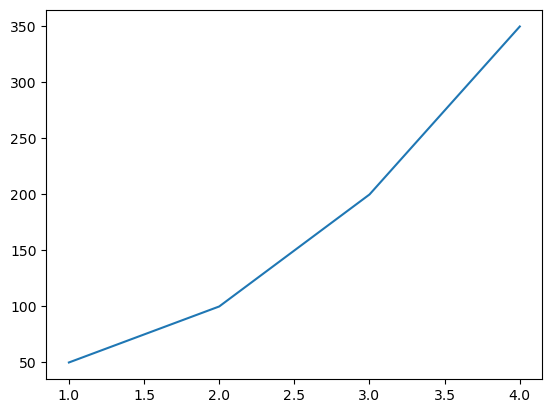

In [19]:
fig,ax = plt.subplots() #every time we call this it reset figure and shows our data
ax.plot(x,[50,100,200,350]) ;#add some data
type(fig),type(ax)

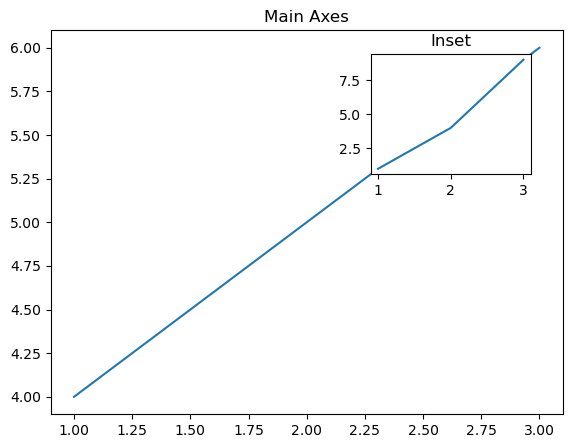

In [18]:
fig = plt.figure()

# Add one axes
ax1=fig.add_axes([0.1,0.1,0.8,0.8]) # left,bottom,width,height
ax1.plot([1,2,3],[4,5,6])
ax1.set_title("Main Axes")

# Add another small inset axes
ax2 =  fig.add_axes([0.6,0.6,0.25,0.25])
ax2.plot([1,2,3],[1,4,9])
ax2.set_title("Inset")

plt.show()

Those numbers in add_axes([left, bottom, width, height]) are relative positions inside the Figure, expressed in figure coordinates (0 to 1 range).

Breakdown of [0.6, 0.6, 0.25, 0.25]

left = 0.6 → the left edge of this Axes is placed at 60% from the left side of the Figure.

bottom = 0.6 → the bottom edge is placed at 60% from the bottom of the Figure.

width = 0.25 → the Axes takes up 25% of the Figure’s width.

height = 0.25 → the Axes takes up 25% of the Figure’s height.

Visualization in words

Imagine the figure as a square going from (0,0) at bottom-left to (1,1) at top-right:

(0,1) ------------------- (1,1)
       |             |
       |   [0.6,0.6] Axes here
       |             |
(0,0) ------------------- (1,0)


So [0.6, 0.6, 0.25, 0.25] means:
➡ Put a small Axes starting at 60% from the left, 60% from the bottom, and let it cover 25% width × 25% height.

That’s why it looks like a small inset plot inside the bigger one.

<hr/>
When we write:

fig.add_axes([0.1, 0.1, 0.8, 0.8])


it means:

left = 0.1 → start 10% from the left of the Figure

bottom = 0.1 → start 10% from the bottom

width = 0.8 → take 80% of the width

height = 0.8 → take 80% of the height

So this makes a nice centered Axes that fits well inside the Figure.

Why not [1,1,1,1]?

Coordinates in add_axes() are relative and expected to be between 0 and 1.

If you give 1,1,1,1, that means:

left edge starts at 100% of the Figure width (so off the right side!)

bottom edge starts at 100% of the Figure height (so off the top side!)

then width = 100% of figure and height = 100% of figure → but starting from outside.

👉 That pushes the entire Axes outside the visible area, so you won’t see it.

In short:

[0.1, 0.1, 0.8, 0.8] → visible, centered Axes.

[0, 0, 1, 1] → Axes covers the whole Figure (edge-to-edge).

[1, 1, 1, 1] → completely outside → invisible.

<h1 style="color:red">lec 81:- Anatomy of Matplotlib Figure`</h1>

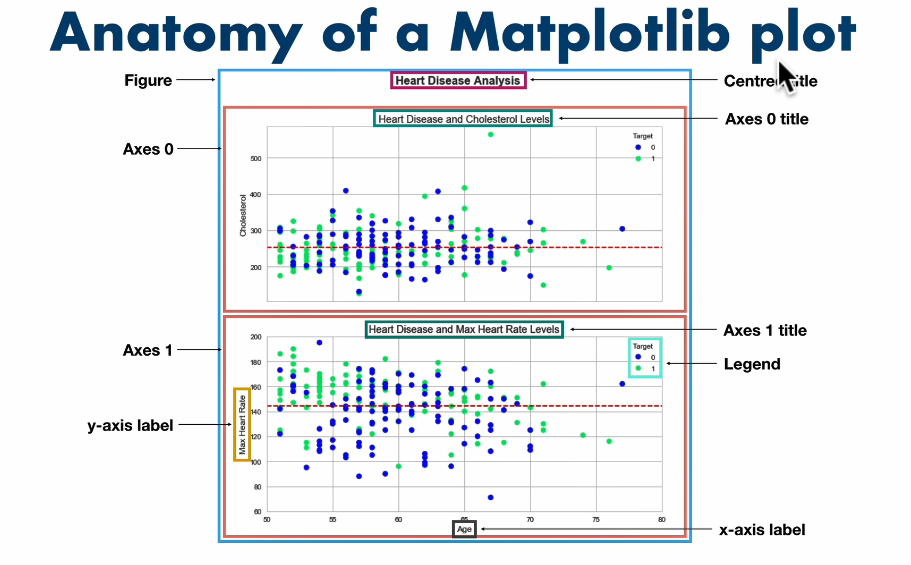

## Matplotlib example workflow

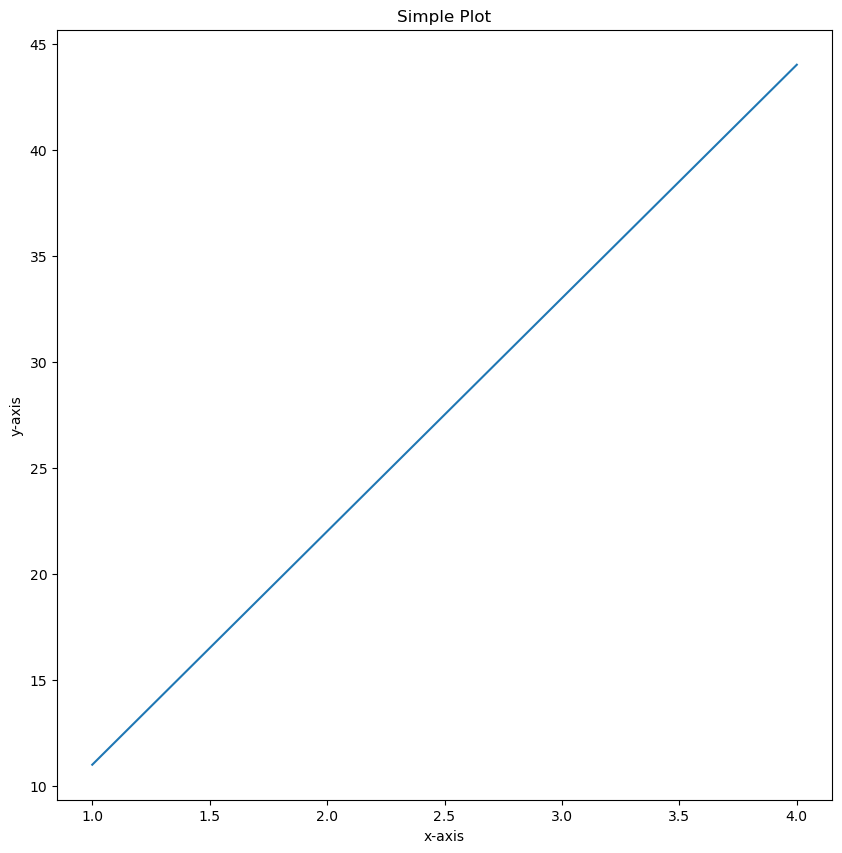

In [22]:
# 0. import matplotlib and get it ready for plotting in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x=[1,2,3,4]
y=[11,22,33,44]

# 2. Setup plot
fig,ax = plt.subplots(figsize=(10,10)) # figsize=(height,width) of (fig canvas)

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show(you save the whole figure)
fig.savefig("../images/sample-plot.png")

In [23]:
# misclleneous
fig.canvas.get_supported_filetypes() # to get supported file formats

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

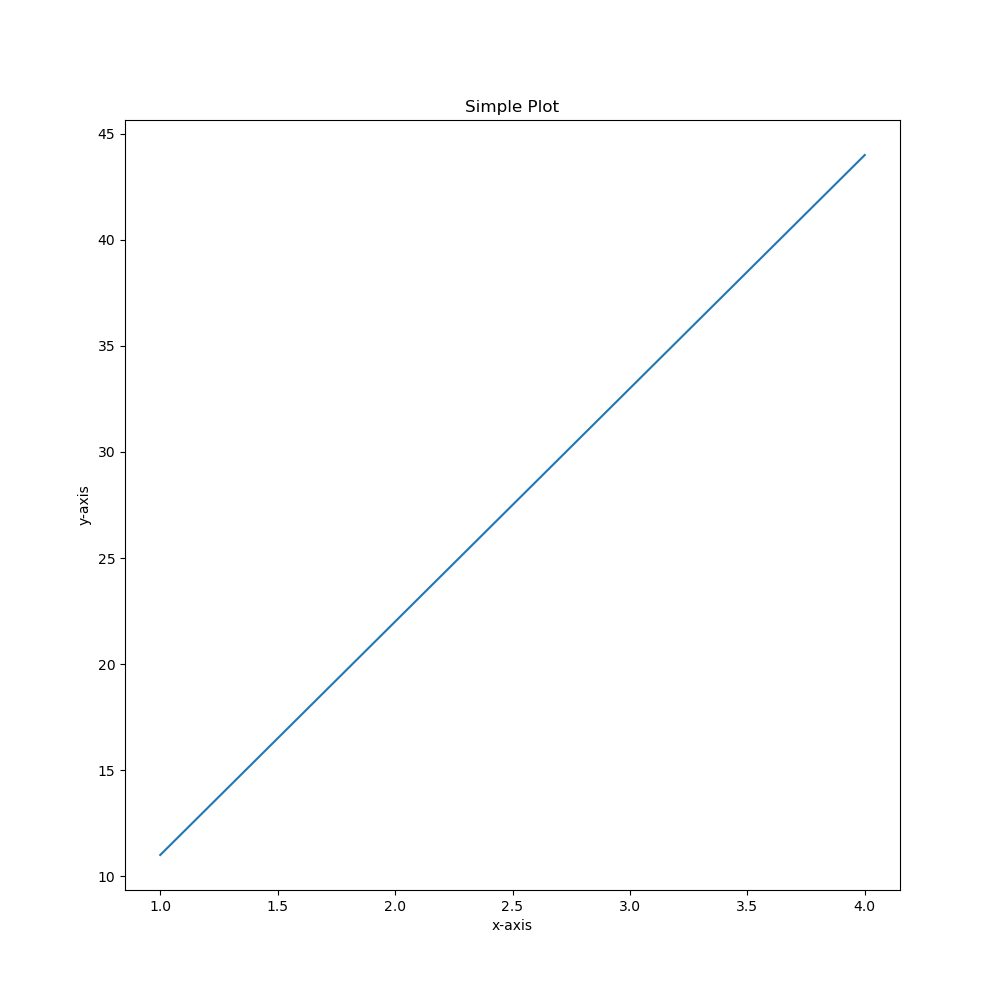

In [24]:
# for displaying images in python
from IPython.display import Image
Image("../images/sample-plot.png")

<h1 style="color:red">lec 82:- Scatter Plot And Bar Plot</h1>

## Making figures with numpy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [25]:
import numpy as np

In [26]:
# Create some data
x = np.linspace(0,10,100)

np.linspace() is a NumPy function used to generate evenly spaced numbers over a specified range.

Syntax:
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

Parameters:

start → The starting value of the sequence.

stop → The ending value of the sequence.

num → (default = 50) The number of values to generate.

endpoint → (default = True)

If True, the sequence includes the stop value.

If False, the sequence excludes the stop value.

retstep → (default = False)

If True, it also returns the step size (difference between consecutive numbers).

dtype → The data type of the output array.

Example 1: Basic usage
import numpy as np

arr = np.linspace(0, 10, 5)
print(arr)


Output:

[ 0.   2.5  5.   7.5 10. ]


👉 It divided the interval [0, 10] into 5 evenly spaced points.

Example 2: Excluding the endpoint
np.linspace(0, 10, 5, endpoint=False)


Output:

[0. 2. 4. 6. 8.]


👉 Here 10 is not included.

Example 3: Returning step size
arr, step = np.linspace(0, 1, 5, retstep=True)
print(arr)
print("Step:", step)


Output:

[0.   0.25 0.5  0.75 1.  ]
Step: 0.25


✅ In short: np.linspace() is best when you want a specific number of evenly spaced samples between two values.

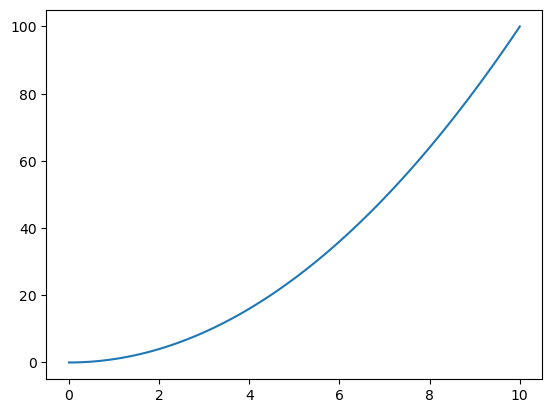

In [27]:
# Plot the data and create a line plot
fig,ax = plt.subplots()
ax.plot(x,x**2)

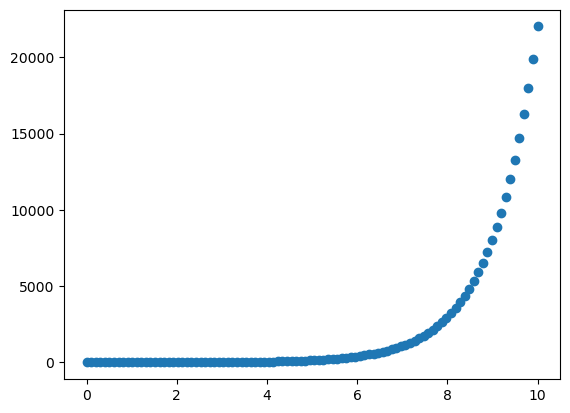

In [28]:
# Use same data to make a  scatter
fig,ax = plt.subplots()
ax.scatter(x,np.exp(x))

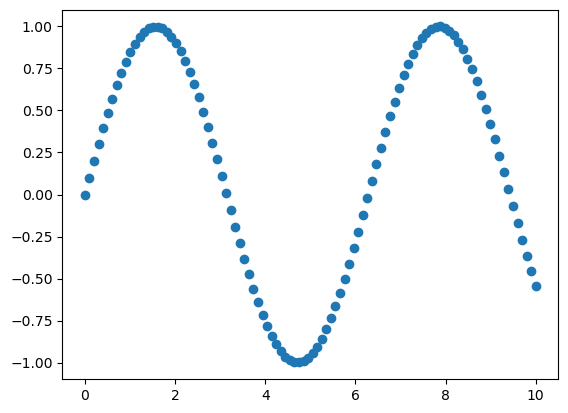

In [29]:
# Another scatter plot
fig,ax = plt.subplots()
ax.scatter(x,np.sin(x))

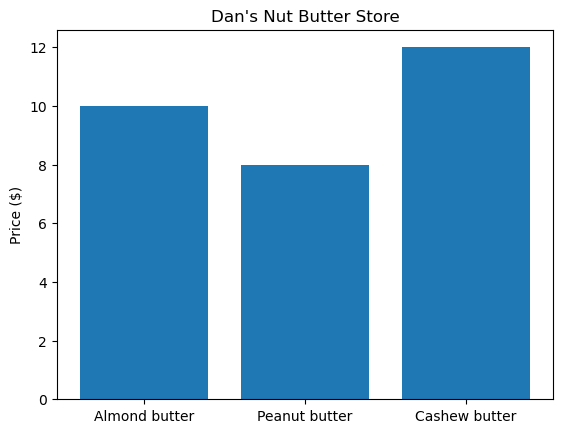

In [31]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter":10,
                    "Peanut butter":8,
                    "Cashew butter":12}
fig,ax = plt.subplots()
ax.bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)"); #for removing that unwanted line use 
# ";"  after last line or use plt.show()

<h1 style="color:red">lec 83:-Histograms And Subplots</h1>

<BarContainer object of 3 artists>

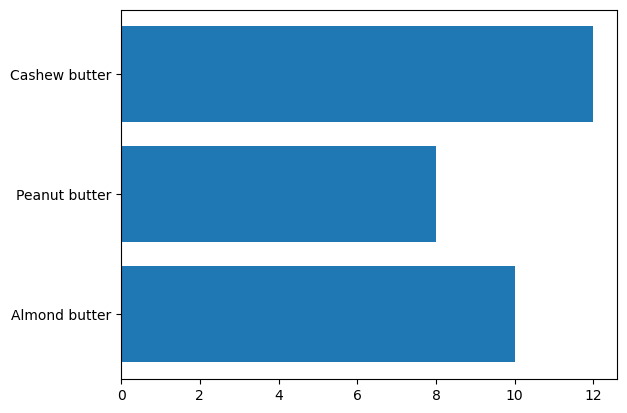

In [32]:
fig,ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()))
# for barh we have to give arguments in list format

In [34]:
# Make some data for histogram
x = np.random.randn(1000) #return data like normal distribution

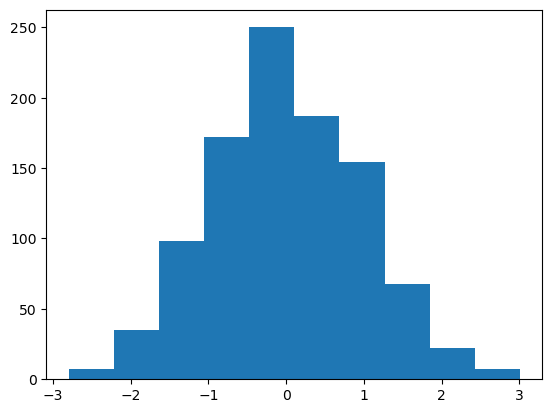

In [35]:
fig,ax = plt.subplots()
ax.hist(x);

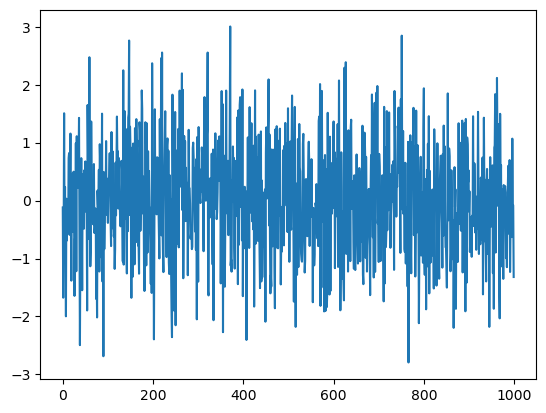

In [41]:
fig,ax = plt.subplots()
ax.plot(x);

In [43]:
x.size,x.shape,x.ndim

(1000, (1000,), 1)

## Two options for subplots

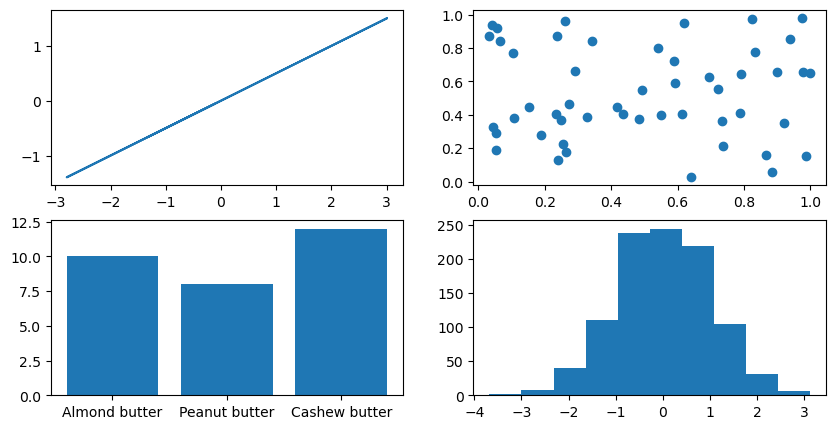

In [46]:
# Subplot option 1
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                         ncols=2,
                                         figsize=(10,5))
# Plot to each different axis
ax1.plot(x,x/2);
ax2.scatter(np.random.random(50),np.random.random(50));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

<h1 style="color:red">lec 84:-Subplots Option 2</h1>

(numpy.ndarray, (2, 2), 4, 2)

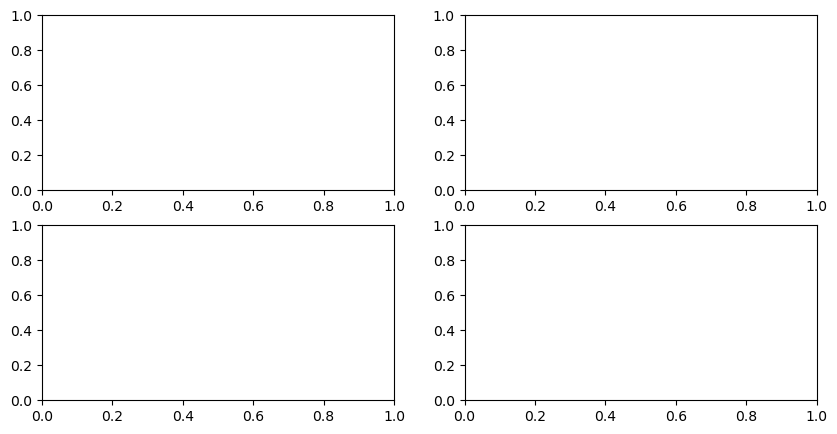

In [49]:
# Subplots option 2
fig,ax = plt.subplots(nrows=2,
                     ncols=2,
                     figsize=(10,5))
type(ax),ax.shape,ax.size,ax.ndim

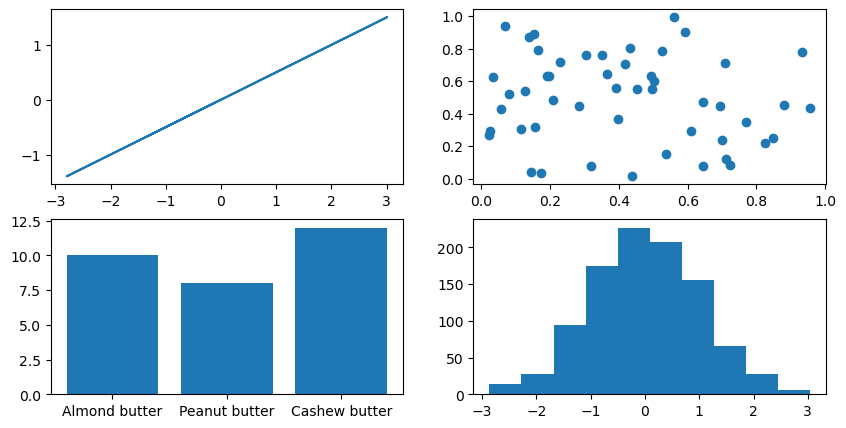

In [51]:
# use fig,ax = plt.subplots in same cell in which you are plotting

fig,ax = plt.subplots(nrows=2,
                     ncols=2,
                     figsize=(10,5))
# Plot to each different index
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(50),np.random.random(50));
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));


<h1 style="color:red">lec 86:-Plotting From Pandas DataFrames</h1>

In [52]:
import pandas as pd

In [64]:
# Make a dataframe
car_sales = pd.read_csv("49 - car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

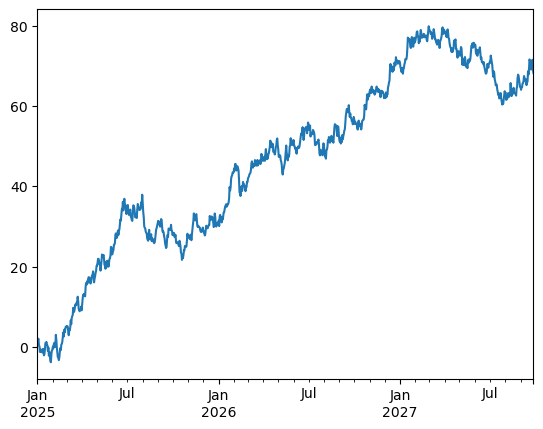

In [56]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2025",periods=1000))
ts = ts.cumsum() # for cumulative sum like we do  in  median
ts.plot()

<h1 style="color:red">Quick Note:- For Regular Expression (regex)</h1>

🔹 Basic Syntax

. → any char

Pattern: c.t

Text: "cat, cot, cut" → Matches: cat, cot, cut

^ → start of string

Pattern: ^Hello

Text: "Hello world" → Match: Hello

$ → end of string

Pattern: world$

Text: "Hello world" → Match: world

[...] → char set

Pattern: [aeiou]

Text: "chat" → Matches: a

[^...] → negated set

Pattern: [^aeiou]

Text: "chat" → Matches: c, h, t

| → OR

Pattern: cat|dog

Text: "dog is here" → Match: dog

() → grouping

Pattern: (ha)+

Text: "hahaha" → Match: hahaha

🔹 Quantifiers

* → 0 or more

Pattern: go*

Text: "g, go, gooo" → Matches: g, go, gooo

+ → 1 or more

Pattern: go+

Text: "g, go, gooo" → Matches: go, gooo

? → 0 or 1

Pattern: colou?r

Text: "color, colour" → Matches: color, colour

{n} → exactly n

Pattern: \d{3}

Text: "12345" → Match: 123

{n,} → n or more

Pattern: a{2,}

Text: "caaandy" → Match: aaa

{n,m} → between n and m

Pattern: a{2,4}

Text: "aaaaa" → Matches: aaaa

🔹 Shorthands

\d → digit

Pattern: \d+

Text: "Room 101" → Match: 101

\D → non-digit

Pattern: \D+

Text: "Room 101" → Match: Room

\w → word char

Pattern: \w+

Text: "Hi_123!" → Matches: Hi_123

\W → non-word char

Pattern: \W+

Text: "Hi_123!" → Match: !

\s → whitespace

Pattern: \s+

Text: "Hi there" → Match: " "

\S → non-whitespace

Pattern: \S+

Text: "Hi there" → Matches: Hi, there

\b → word boundary

Pattern: \bcat\b

Text: "a cat sat" → Match: cat

\B → not boundary

Pattern: \Bcat\B

Text: "educate" → Match: cat

🔹 Special Constructs

(?i) → case-insensitive

Pattern: (?i)hello

Text: "HeLLo" → Match: HeLLo

(?:...) → non-capturing group

Pattern: (?:ha)+!

Text: "hahaha!" → Match: hahaha!

(?=...) → positive lookahead

Pattern: \d(?=px)

Text: "10px" → Match: 0 (before px)

(?!...) → negative lookahead

Pattern: \d(?!px)

Text: "10cm" → Match: 0 (not before px)

(?<=...) → positive lookbehind

Pattern: (?<=\$)\d+

Text: "Price is $100" → Match: 100

(?<!...) → negative lookbehind

Pattern: (?<!\$)\d+

Text: "100 USD" → Match: 100

<hr/>

If you want to spend a few hours learning about RegEx in detail and want to follow a fun interactive tutorial, here is a nice free way to get yourself comfortable with some of the common patterns. Enjoy it! And see you in the next video :) (but it is completely optional!)



https://regexone.com/

<h1 style="color:red">lec 88:-Plotting From Pandas DataFrames</h1>

In [65]:
car_sales["Price"] = car_sales["Price"].str.replace(r"[\$,.]","",regex=True).astype("int")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [66]:
type(car_sales["Price"][0])

numpy.int64

In [67]:
# Remove last two things
car_sales["Price"] = car_sales["Price"].astype("str").str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [69]:
car_sales["Sale Date"] = pd.date_range("1/1/2025",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2025-01-01
1,Honda,Red,87899,4,5000,2025-01-02
2,Toyota,Blue,32549,3,7000,2025-01-03
3,BMW,Black,11179,5,22000,2025-01-04
4,Nissan,White,213095,4,3500,2025-01-05
5,Toyota,Green,99213,4,4500,2025-01-06
6,Honda,Blue,45698,4,7500,2025-01-07
7,Honda,Blue,54738,4,7000,2025-01-08
8,Toyota,White,60000,4,6250,2025-01-09
9,Nissan,White,31600,4,9700,2025-01-10


In [72]:
# reset index of data frame
df = pd.DataFrame({"A":[10,20,30]},index = ["X","Y","Z"])
print(df)
df_reset1 = df.reset_index()
print(df_reset1)
df_reset2 = df.reset_index(drop=True) # drop = remove old index
print(df_reset2)
df_new = df_reset1.set_index("index") #set an existing column as index
print(df_new)

    A
X  10
Y  20
Z  30
  index   A
0     X  10
1     Y  20
2     Z  30
    A
0  10
1  20
2  30
        A
index    
X      10
Y      20
Z      30


In [73]:
#1. Reset the index to default (0,1,2...)
import pandas as pd

df = pd.DataFrame({"A": [10, 20, 30]}, index=["x", "y", "z"])
print(df)

df_reset = df.reset_index(drop=True)  # drop=True removes old index
print(df_reset)


    A
x  10
y  20
z  30
    A
0  10
1  20
2  30


In [77]:
# Example 1A: With index name already set
import pandas as pd

df = pd.DataFrame({"A": [10, 20, 30]}, index=["x", "y", "z"])
df.index.name = "old_index"   # give a name to index
print(df)

df_reset = df.reset_index()
print(df_reset)


            A
old_index    
x          10
y          20
z          30
  old_index   A
0         x  10
1         y  20
2         z  30


In [78]:
# Example 1B: If index has no name

df = pd.DataFrame({"A": [10, 20, 30]}, index=["x", "y", "z"])

df_reset = df.reset_index(names="previous_index")  
print(df_reset)


  previous_index   A
0              x  10
1              y  20
2              z  30


✅ So the trick:-

*df.index.name = "something" → before reset

*Or df.reset_index(names="something") → during reset

In [74]:
# 2. Set an existing column as index
df = pd.DataFrame({"id": [101, 102, 103], "name": ["a", "b", "c"]})
df_new = df.set_index("id")
print(df_new)


    name
id      
101    a
102    b
103    c


In [75]:
# 3. Assign a completely new index
df = pd.DataFrame({"A": [1, 2, 3]})
df.index = ["row1", "row2", "row3"]
print(df)


      A
row1  1
row2  2
row3  3


In [76]:
# 4. Change index with a range
df = pd.DataFrame({"A": [5, 6, 7]})
df.index = range(100, 103)  # custom numeric index
print(df)


     A
100  5
101  6
102  7


In [79]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,40005000
2,Toyota,Blue,32549,3,7000,2025-01-03,400050007000
3,BMW,Black,11179,5,22000,2025-01-04,40005000700022000
4,Nissan,White,213095,4,3500,2025-01-05,400050007000220003500
5,Toyota,Green,99213,4,4500,2025-01-06,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2025-01-07,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2025-01-08,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2025-01-09,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2025-01-10,40005000700022000350045007500700062509700


In [80]:
# first convert price enteries from string to int
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2025-01-01,4000
1,Honda,Red,87899,4,5000,2025-01-02,9000
2,Toyota,Blue,32549,3,7000,2025-01-03,16000
3,BMW,Black,11179,5,22000,2025-01-04,38000
4,Nissan,White,213095,4,3500,2025-01-05,41500
5,Toyota,Green,99213,4,4500,2025-01-06,46000
6,Honda,Blue,45698,4,7500,2025-01-07,53500
7,Honda,Blue,54738,4,7000,2025-01-08,60500
8,Toyota,White,60000,4,6250,2025-01-09,66750
9,Nissan,White,31600,4,9700,2025-01-10,76450


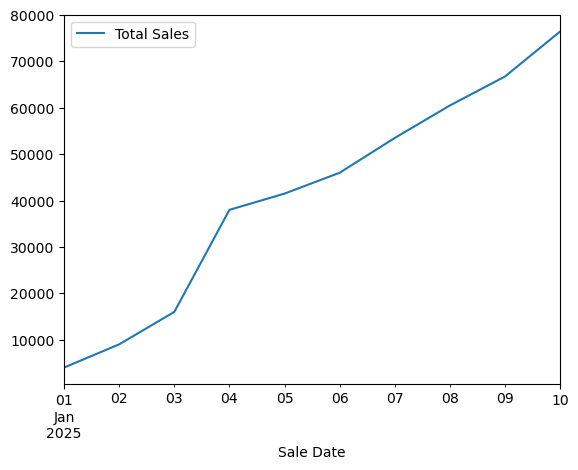

In [82]:
# Let's plot the total sales
car_sales.plot(x ="Sale Date",y="Total Sales");

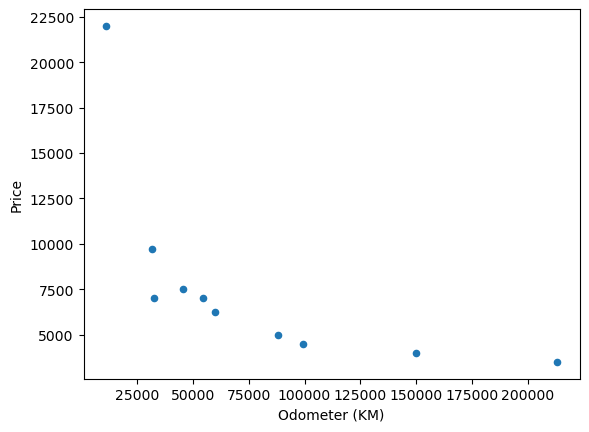

In [85]:
# y's column must be numeric
car_sales["Price"]=car_sales["Price"].astype("int")
car_sales.plot(x="Odometer (KM)",y="Price",kind = "scatter");

<h1 style="color:red">lec 89:-Plotting from DataFrames 3</h1>

In [87]:
# How about a bar graph?
x = np.random.rand(10,4)
x

# Turn it into a DataFrame 
df = pd.DataFrame(x,columns = ["a","b","c","d"])
df

,a,b,c,d
0,0.638485,0.546989,0.026584,0.223813
1,0.262759,0.400201,0.573022,0.253779
2,0.798958,0.083393,0.621080,0.040685
3,0.197963,0.054724,0.229013,0.772632
4,0.629402,0.662115,0.319775,0.809500
5,0.264881,0.118221,0.049101,0.628033
6,0.967142,0.065227,0.387933,0.451701
7,0.992877,0.056448,0.781811,0.974278
8,0.003563,0.288414,0.302426,0.333915
9,0.353193,0.938104,0.677408,0.264112


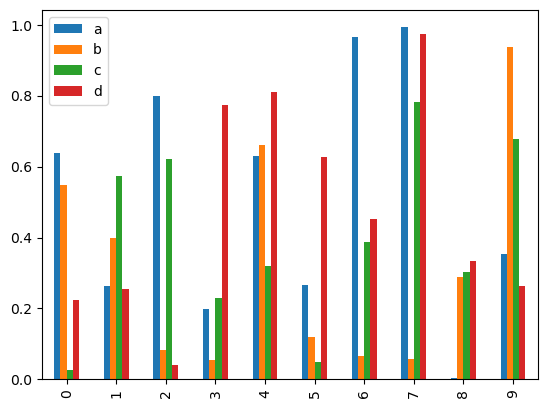

In [88]:
df.plot.bar();

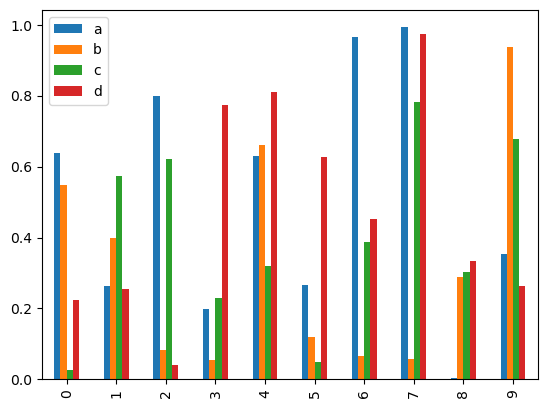

In [90]:
df.plot(kind="bar");

<Axes: >

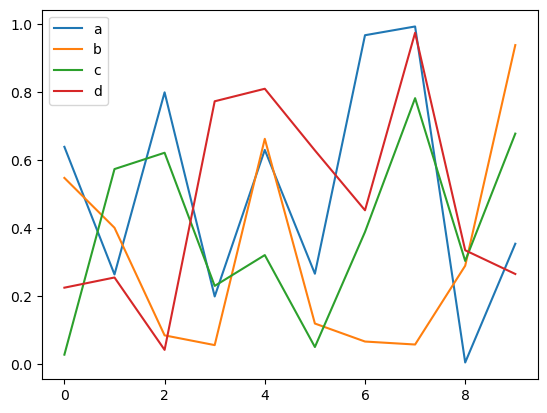

In [94]:
#df.plot(kind="scatter") # doesnot work scatter plot always requires x and y argument
df.plot()

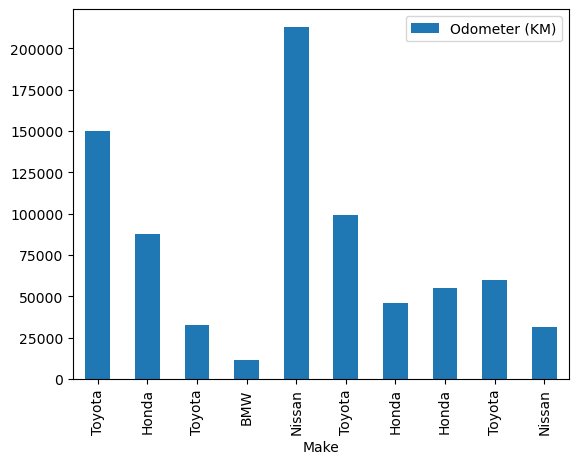

In [101]:
# !!car_sales.plot(y="Make",x="Odometer (KM)",kind="bar"); y must be numeric
car_sales.plot(x="Make",y="Odometer (KM)",kind="bar");

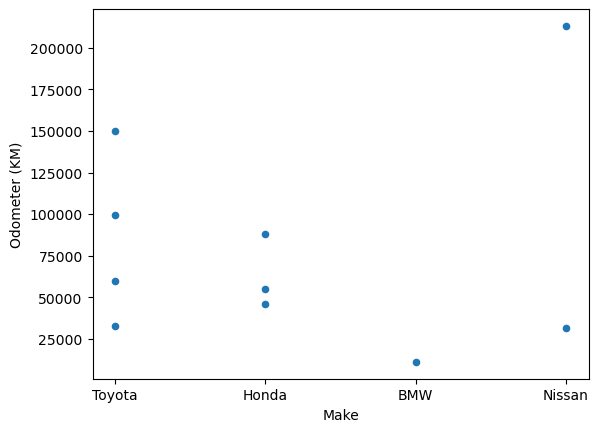

In [102]:
car_sales.plot(x="Make",y="Odometer (KM)",kind="scatter");

## How about histograms?

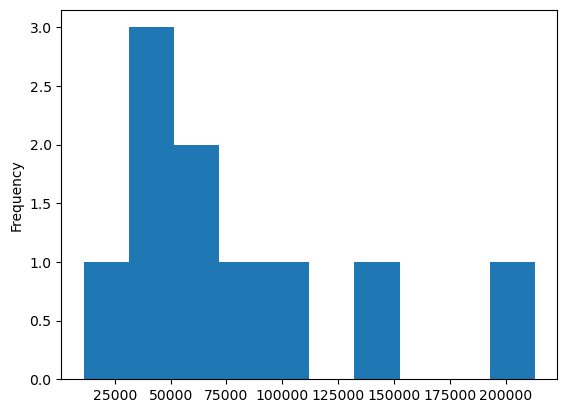

In [103]:
car_sales["Odometer (KM)"].plot.hist();

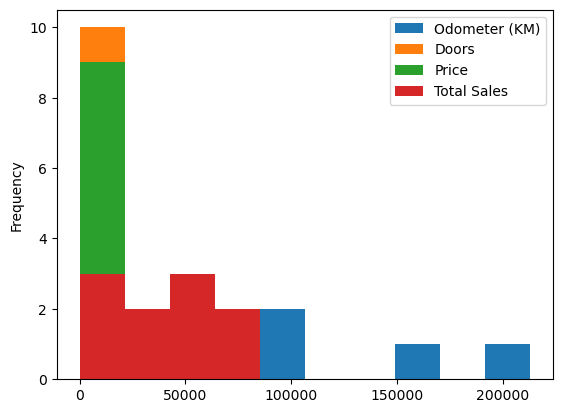

In [106]:
car_sales.plot(kind="hist");

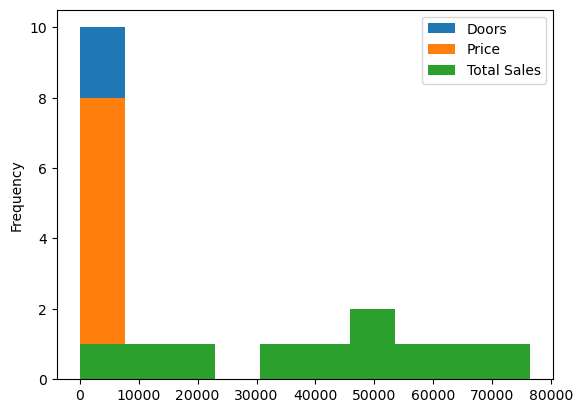

In [107]:
car_sales.plot(x="Odometer (KM)",kind="hist");

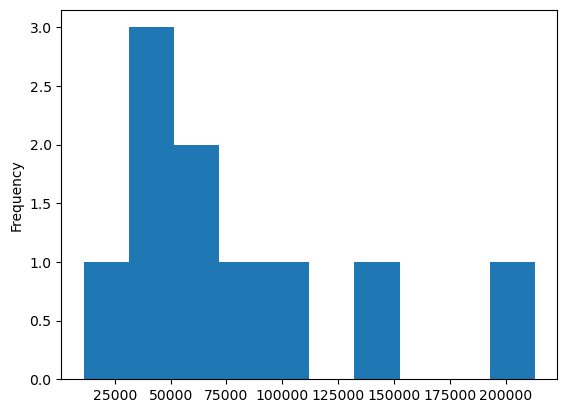

In [108]:
car_sales["Odometer (KM)"].plot(kind="hist");

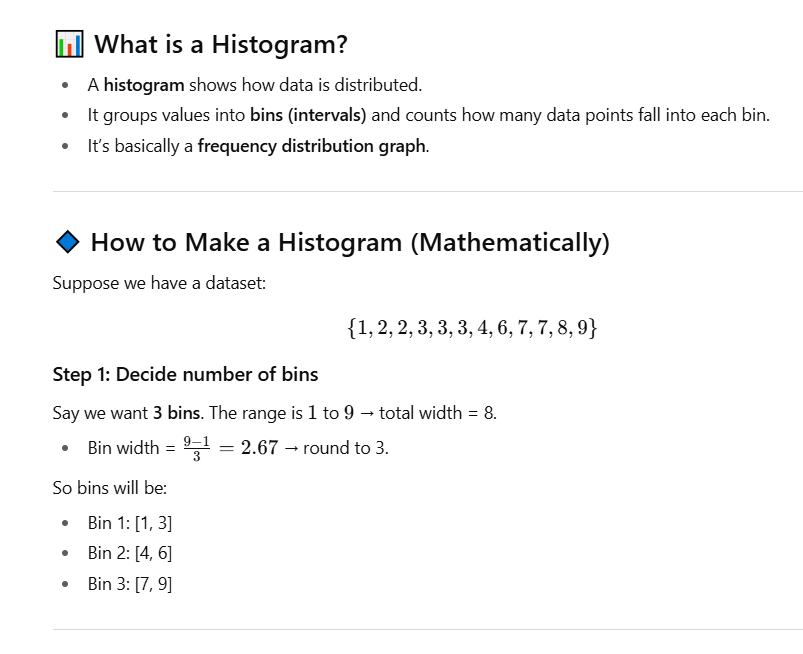

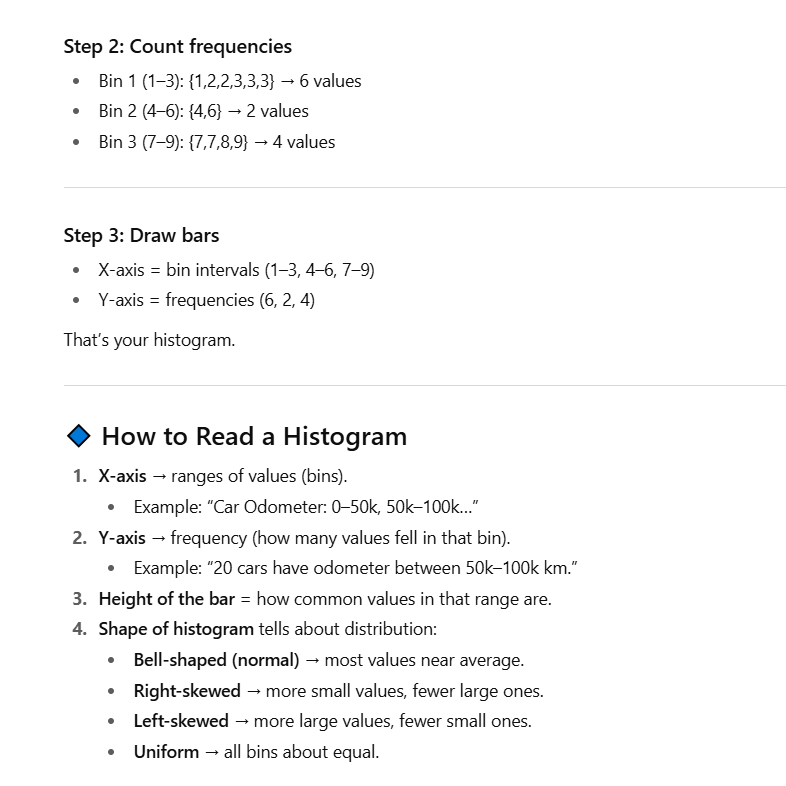

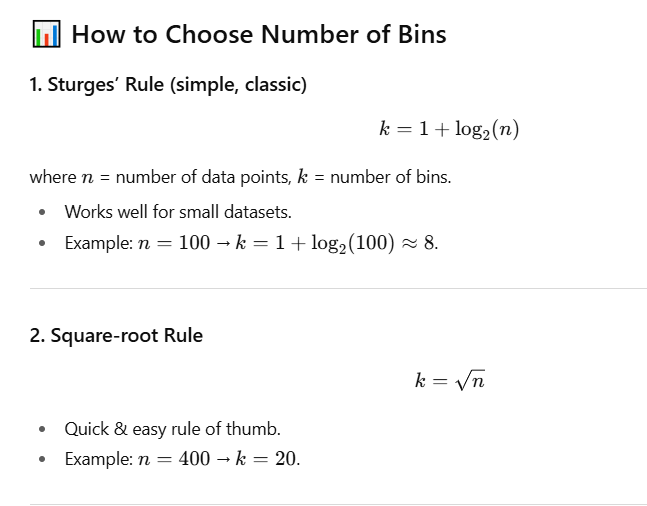

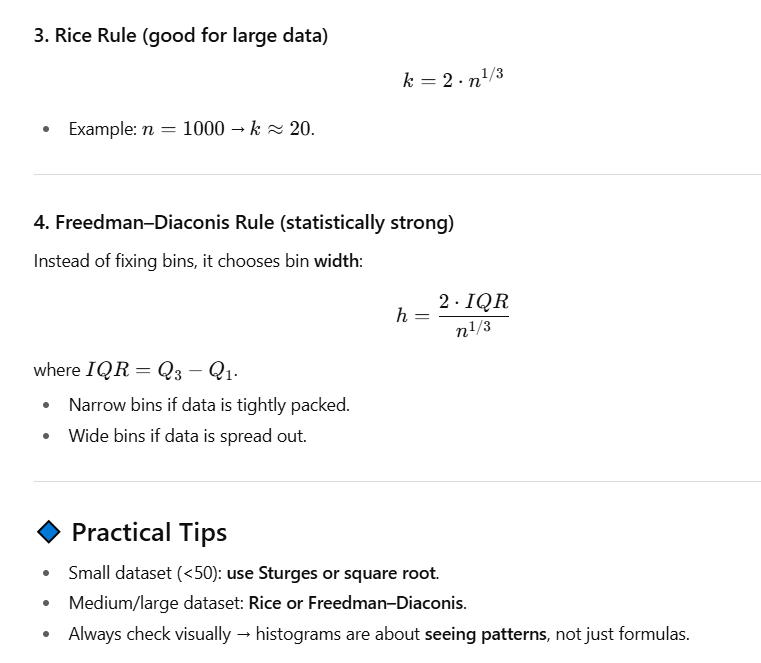

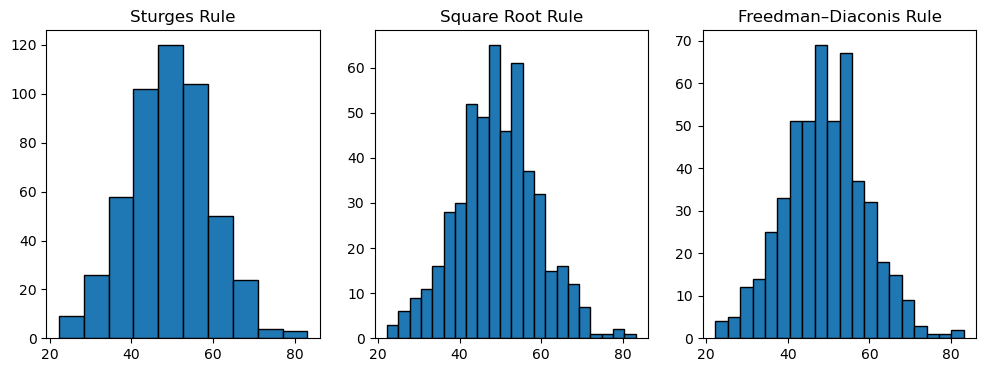

In [110]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(50, 10, 500)  # 500 data points

# Different bin choices
plt.figure(figsize=(12,4))

plt.subplot(1,3,1) # nrows,ncols,index
"""
nrows → number of rows in the grid
ncols → number of columns in the grid
index → which plot to activate
(counting left to right, top to bottom)
"""
plt.hist(data, bins="sturges", edgecolor="black")
plt.title("Sturges Rule")

plt.subplot(1,3,2)
plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor="black")
plt.title("Square Root Rule")

plt.subplot(1,3,3)
plt.hist(data, bins="fd", edgecolor="black")
plt.title("Freedman–Diaconis Rule")

plt.show()

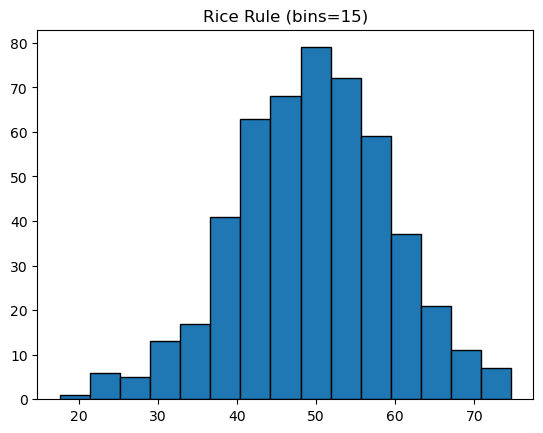

In [111]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(50, 10, 500)

# Rice rule calculation
n = len(data)
k = int(2 * n**(1/3))  # number of bins

plt.hist(data, bins=k, edgecolor="black")
plt.title(f"Rice Rule (bins={k})")
plt.show()


<h1 style="color:red">lec 90:-Plotting from Pandas DataFrame 4</h1>

In [112]:
heart_disease = pd.read_csv("90 - heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


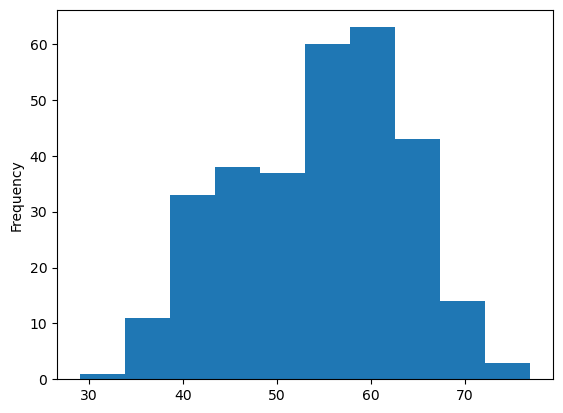

In [113]:
# Create a histogram of age
heart_disease["age"].plot.hist();

In [114]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


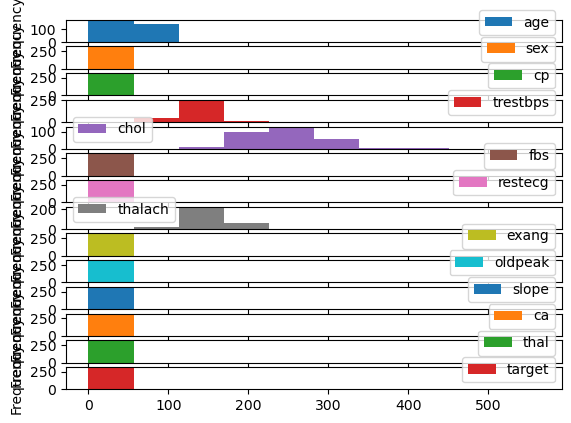

In [116]:
heart_disease.plot.hist(subplots=True);

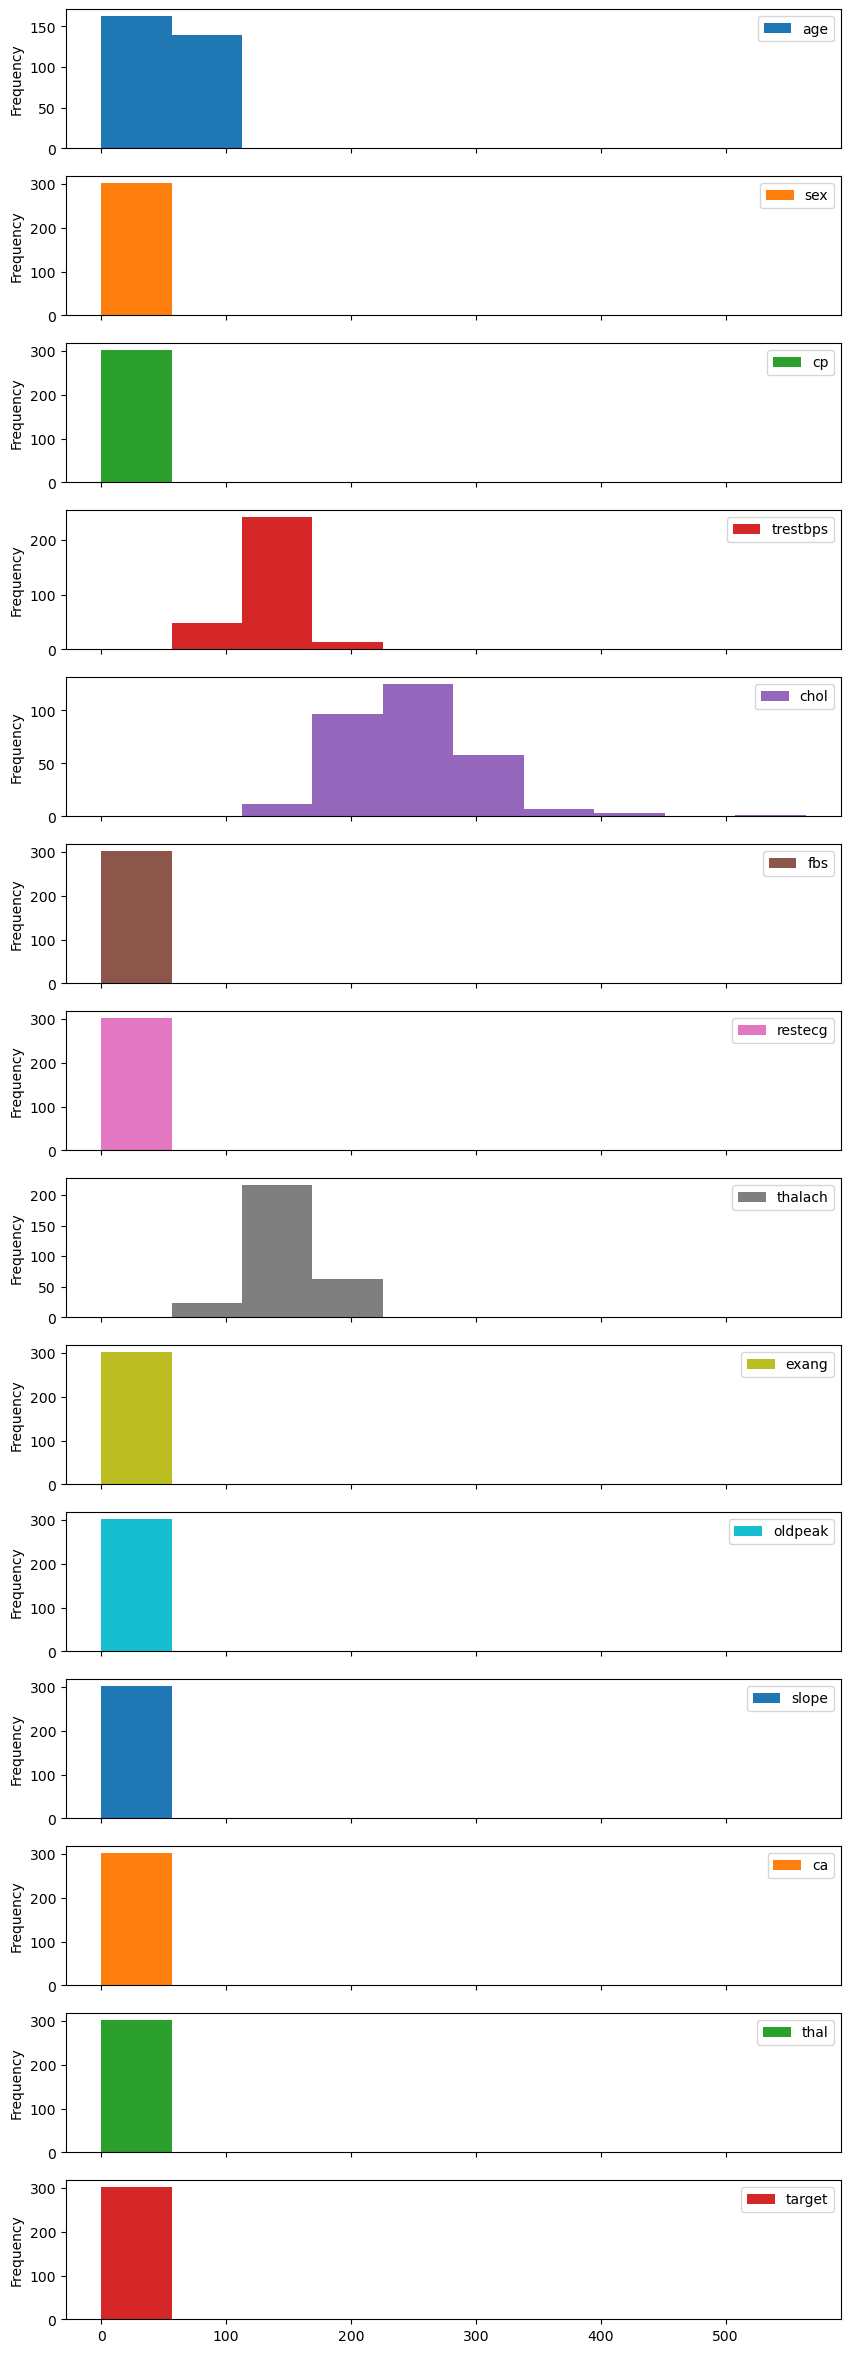

In [117]:
#changing fig size for better readability
heart_disease.plot.hist(figsize=(10 ,30),subplots=True);
# 10inches wide 30 inches tall

<h1 style="color:red">lec 91:-Plotting from DataFrame 5</h1>

### Which one should you use? (pyplot vs object oriented (oo) method)
* When plotting quickly its okay to use pyplot method
* when plotting something advanced use oo method

In [119]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
over_50 = heart_disease[heart_disease["age"]>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


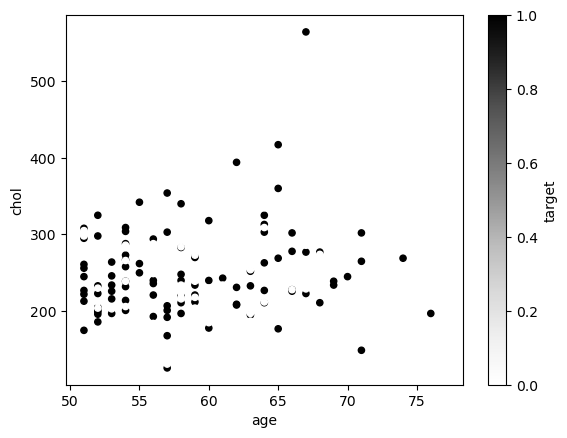

In [123]:
over_50.plot(
    kind="scatter",   # Type of plot: scatter plot
    x="age",          # Column to use for x-axis
    y="chol",         # Column to use for y-axis
    c="target"        # Column to use for color of points
);


<Axes: xlabel='age', ylabel='chol'>

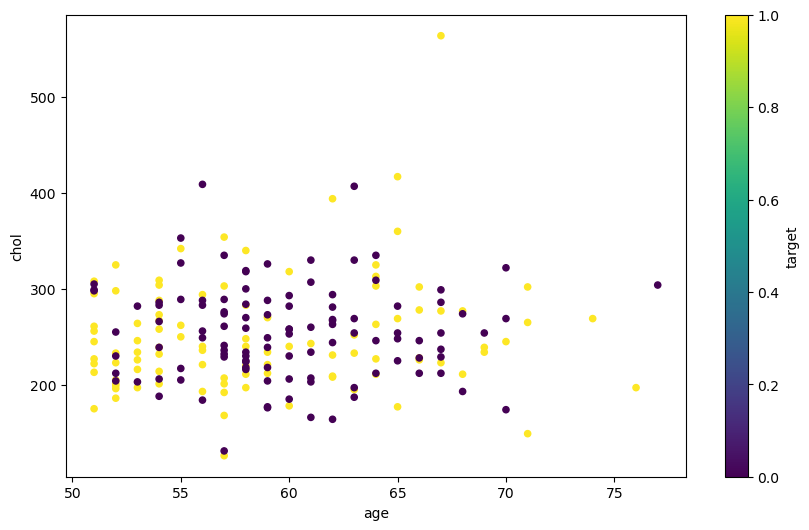

In [124]:
# optional enhancements
over_50.plot(
    kind="scatter",
    x="age",
    y="chol",
    c="target",
    colormap="viridis",  # custom color map
    figsize=(10,6)       # size of the figure
)


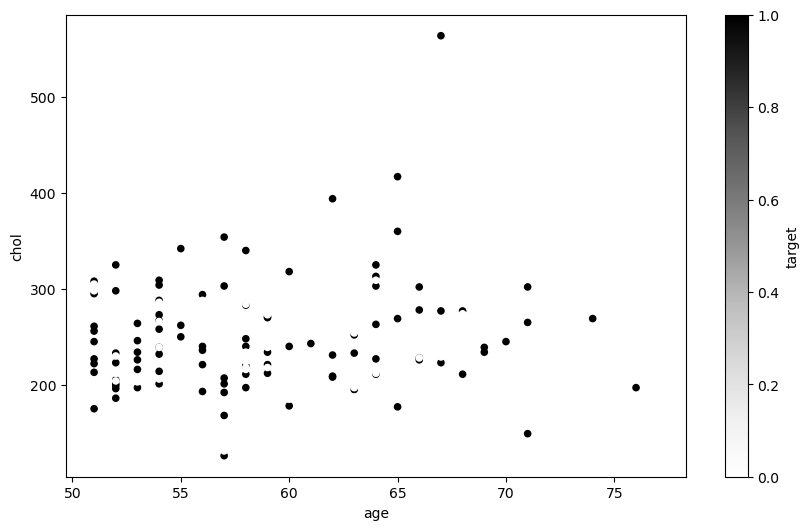

In [127]:
## OO method mixed with pyplot method
fig,ax = plt.subplots(figsize=(10,6)) #these are in inches btw
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax);

#ax.set_xlim([45,100]) # it will change x axis values from 50 80 to
# 45 100

<h1 style="color:red">lec 92:-Plotting from DataFrame 6</h1>

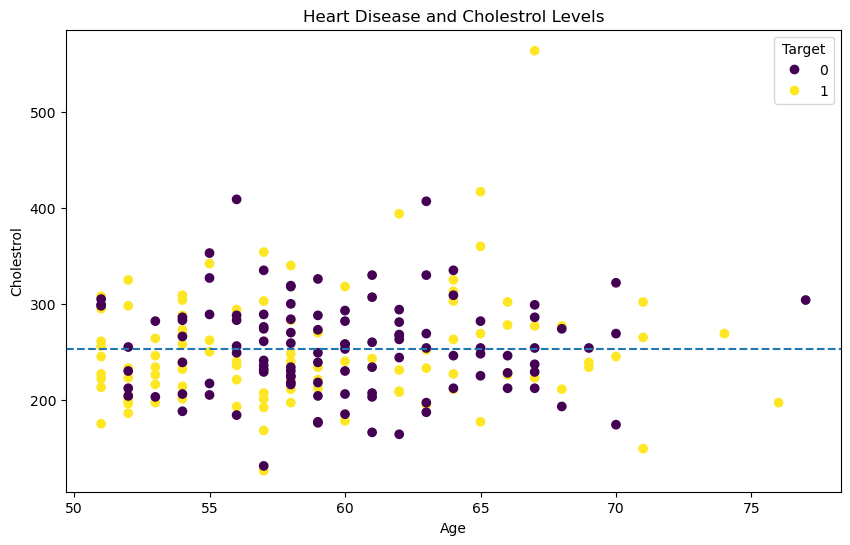

In [132]:
## OO method from scratch
fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"]);

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholestrol");

# Add a legend ('*' for unpacking list)
ax.legend(*scatter.legend_elements(),title="Target");
# what it does go to scatter then see for legend elements in target
# unpack it and show it at top-right with title target

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),linestyle="--"); # first argument
# y axis value at which level you want the horizontal line

<h1 style="color:red">lec 93:-Plotting from DataFrame 7</h1>

In [133]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


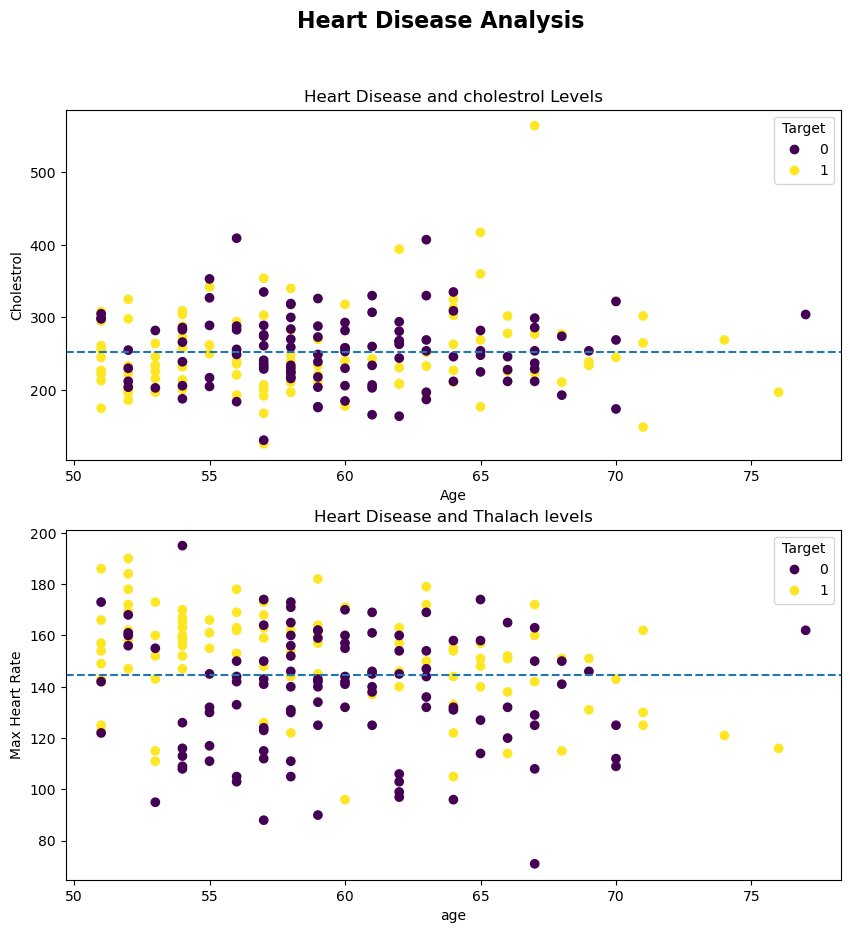

In [148]:
# Subplot of chol,age,thalach
fig,(ax0,ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10))
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# customize ax0
ax0.set(title="Heart Disease and cholestrol Levels",
       xlabel = "Age",
       ylabel="Cholestrol")

# Add legend to ax0
ax0.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");


# Add data to ax1
scatter2 = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Thalach levels",
       xlabel="age",
       ylabel="Max Heart Rate")

# add legend to ax1
ax1.legend(*scatter2.legend_elements(),title="Target")

# add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# add a title to the figure  supertitle
fig.suptitle("Heart Disease Analysis",fontsize = 16,fontweight ="bold");

In [143]:
over_50["thalach"].dtype

dtype('int64')

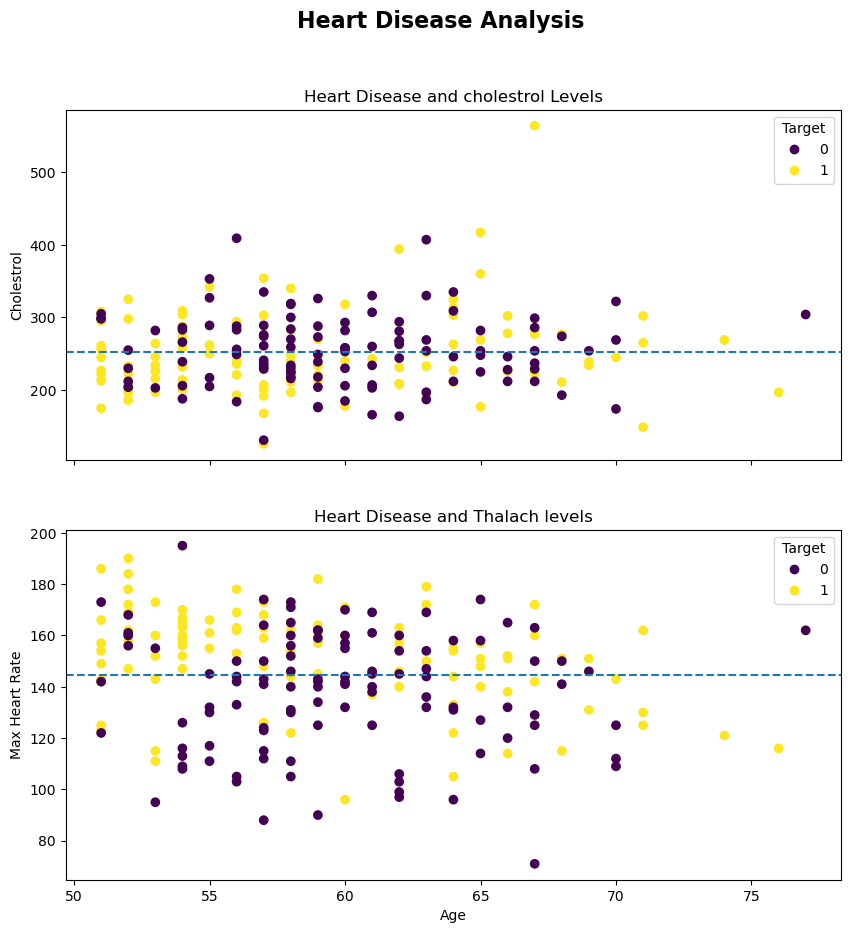

In [178]:
plt.style.use("default")
# sharex
fig,(ax0,ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10),
                            sharex=True) # if we add sharex = True here
# then we can remove the xlabel of ax0 we are telling our subplots
# that at x axis values are same in both subplots

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

# customize ax0
ax0.set(title="Heart Disease and cholestrol Levels",
       ylabel="Cholestrol")

# Add legend to ax0
ax0.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");


# Add data to ax1
scatter2 = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Thalach levels",
       xlabel="Age",
       ylabel="Max Heart Rate")

# add legend to ax1
ax1.legend(*scatter2.legend_elements(),title="Target")

# add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# add a title to the figure  supertitle
fig.suptitle("Heart Disease Analysis",fontsize = 16,fontweight ="bold");

<h1 style="color:red">lec 94:-Customizing Your PLots</h1>

## Customizing Matplotlib plots and getting stylish

In [151]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

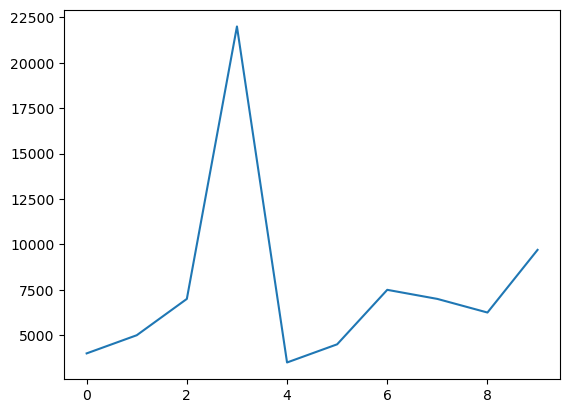

In [153]:
# Default style
car_sales["Price"].plot();

In [155]:
plt.style.use('seaborn-v0_8-whitegrid')

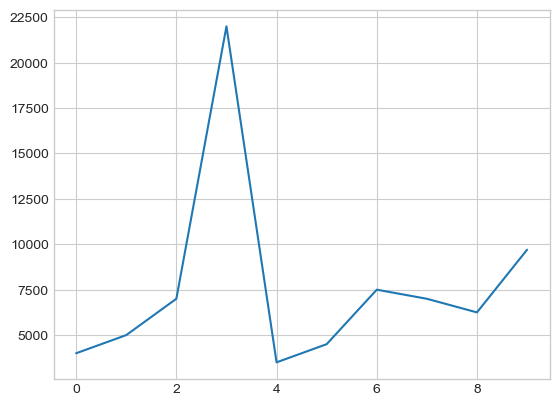

In [156]:
car_sales['Price'].plot();

In [157]:
plt.style.use("seaborn-v0_8")

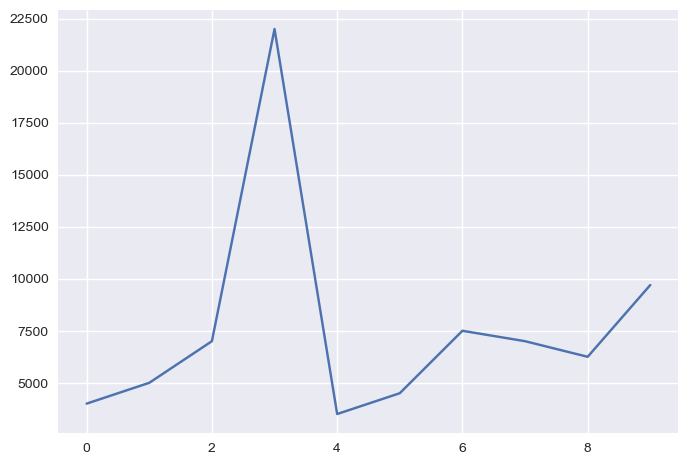

In [158]:
car_sales["Price"].plot();

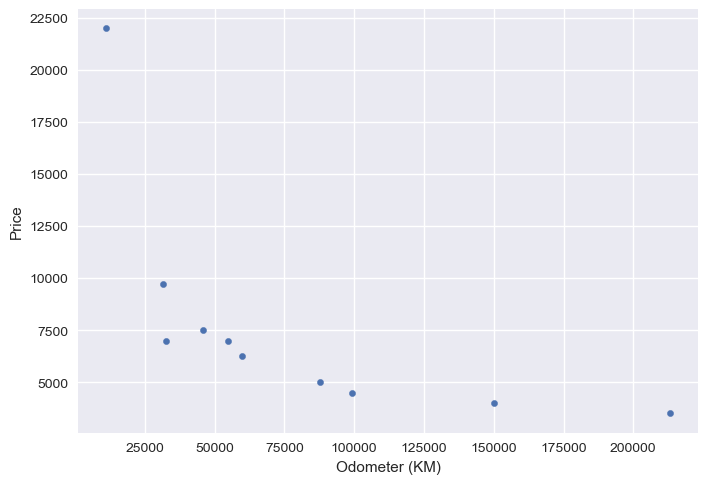

In [161]:
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");

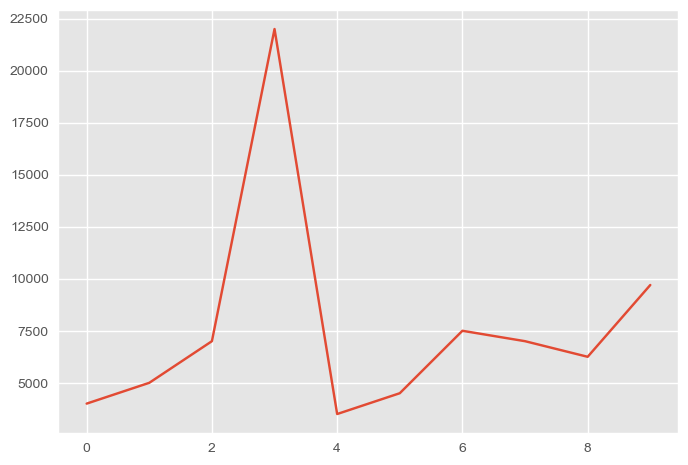

In [162]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [163]:
# Create some data
x = np.random.randn(10,4)
x

array([[ 0.4833234 ,  1.21484444, -0.22813256,  1.20972284],
       [ 0.52461958,  0.86668564,  0.42559392,  0.0264177 ],
       [-0.23247321, -1.3175448 ,  1.21972606,  0.22625401],
       [ 0.52019705,  0.97545525,  0.66155948,  1.73109481],
       [ 0.20872808, -2.02493706, -0.43823554, -0.87241894],
       [-0.87534745, -1.65528612,  0.47715596,  0.80369083],
       [ 0.92415156, -0.31258604,  0.81505877,  0.62351148],
       [ 1.09015181,  0.8171049 , -1.86773038, -2.20161102],
       [ 0.37735484,  0.30289765,  1.37014618,  1.76843099],
       [ 1.13615815,  1.84392382, -1.09201064, -0.0078152 ]])

In [164]:
df = pd.DataFrame(x,columns=["a","b","c","d"])
df

,a,b,c,d
0,0.483323,1.214844,-0.228133,1.209723
1,0.524620,0.866686,0.425594,0.026418
2,-0.232473,-1.317545,1.219726,0.226254
3,0.520197,0.975455,0.661559,1.731095
4,0.208728,-2.024937,-0.438236,-0.872419
5,-0.875347,-1.655286,0.477156,0.803691
6,0.924152,-0.312586,0.815059,0.623511
7,1.090152,0.817105,-1.867730,-2.201611
8,0.377355,0.302898,1.370146,1.768431
9,1.136158,1.843924,-1.092011,-0.007815


matplotlib.axes._axes.Axes

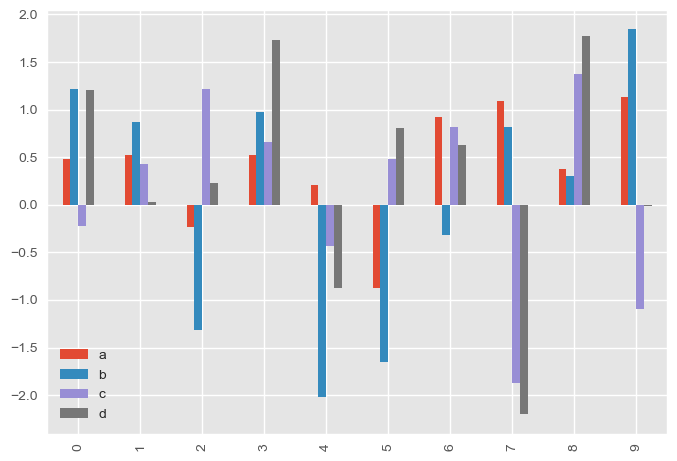

In [165]:
ax = df.plot(kind="bar")
type(ax)

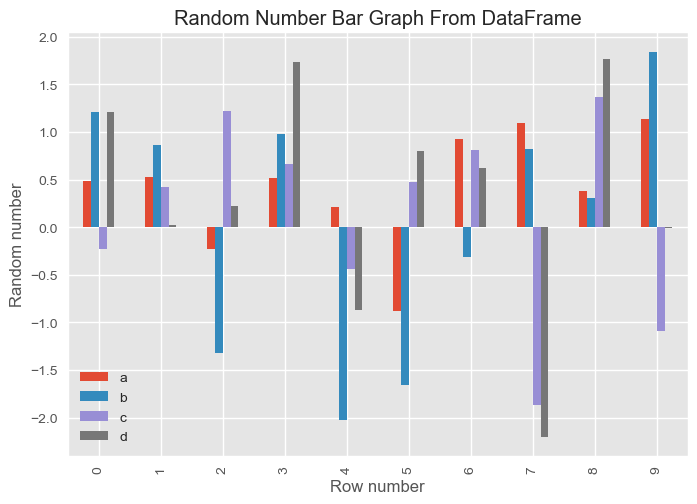

In [167]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random Number Bar Graph From DataFrame",
      xlabel="Row number",
      ylabel="Random number")
# Make the legend visible
ax.legend().set_visible(True)

<h1 style="color:red">lec 95:-Customizing Your Plots 2</h1>

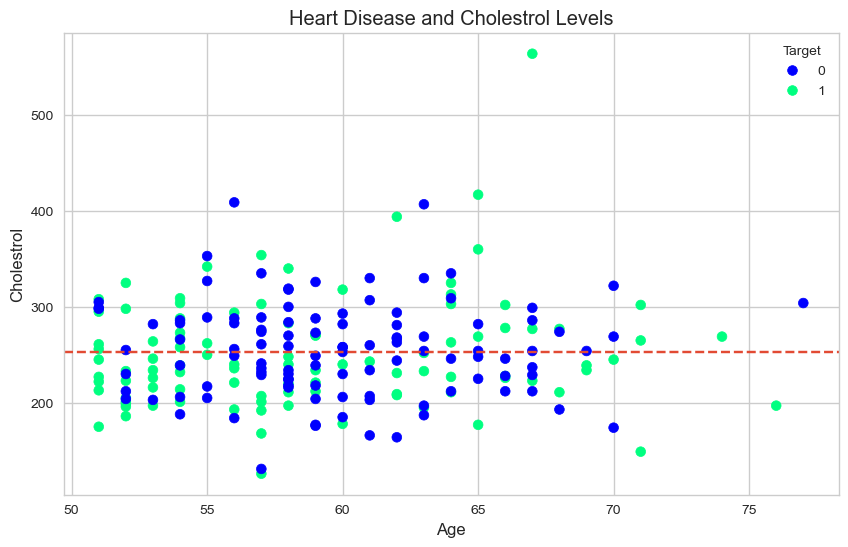

In [173]:
plt.style.use("seaborn-v0_8-whitegrid")

## OO method from scratch
fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"],
                    cmap="winter") # this change the color scheme
# for cmap color argument you can go to matplotlib documentation,
# color guide for see which is best

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholestrol")

# Add a legend
ax.legend(*scatter.legend_elements(),title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--");

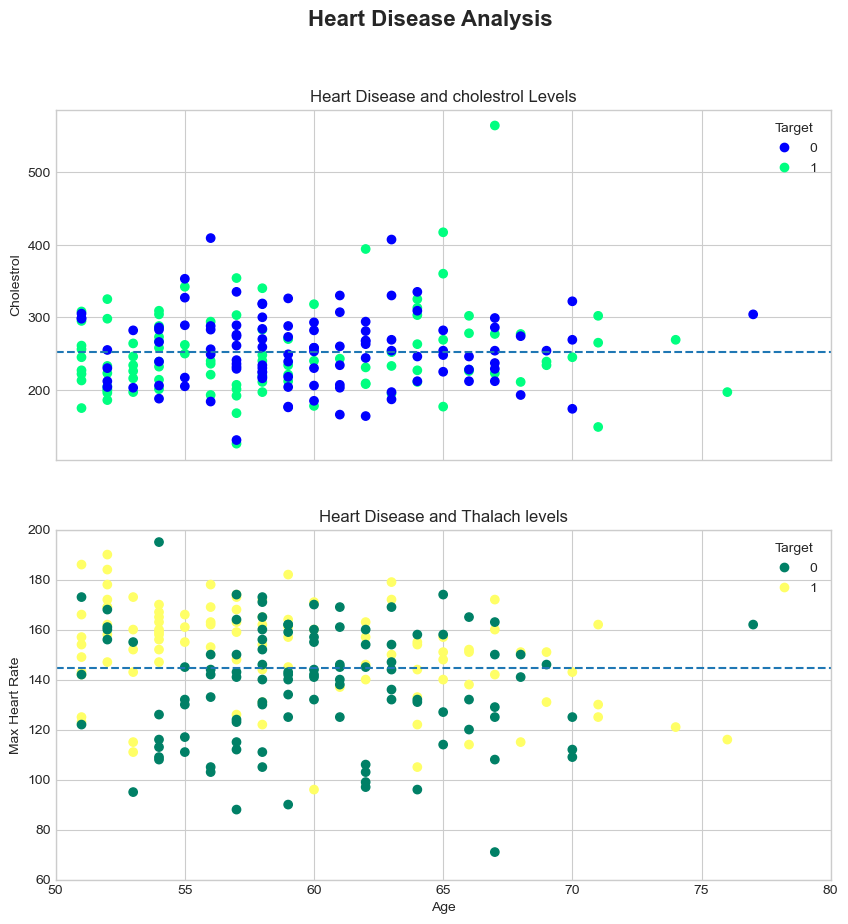

In [187]:
# Customizing the y and x axis limitations
plt.style.use("seaborn-v0_8-whitegrid")

# sharex
fig,(ax0,ax1) = plt.subplots(nrows=2,
                            ncols=1,
                            figsize=(10,10),
                            sharex=True) # if we add sharex = True here
# then we can remove the xlabel of ax0 we are telling our subplots
# that at x axis values are same in both subplots

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")

# customize ax0
ax0.set(title="Heart Disease and cholestrol Levels",
       ylabel="Cholestrol")

# change the x axis limits we can also do it in set arguments xlim=90
ax0.set_xlim([50,80])
# it is changing ax1 limits also because sharex = True

# Add legend to ax0
ax0.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");


# Add data to ax1
scatter2 = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap="summer")

# Customize ax1
ax1.set(title="Heart Disease and Thalach levels",
       xlabel="Age",
       ylabel="Max Heart Rate")

# set x and y limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200]) # sharey is not true so it will not affect ax0

# add legend to ax1
ax1.legend(*scatter2.legend_elements(),title="Target")

# add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# add a title to the figure  supertitle
fig.suptitle("Heart Disease Analysis",fontsize = 16,fontweight ="bold");

## Saving and Sharing Your Plots

In [189]:
# 1. simple way right click on image and  copy output to clipboard
fig.savefig("heart-disease-analysis-plot-saved-with-code.png")
#remember fig will have only the value of last plot you made

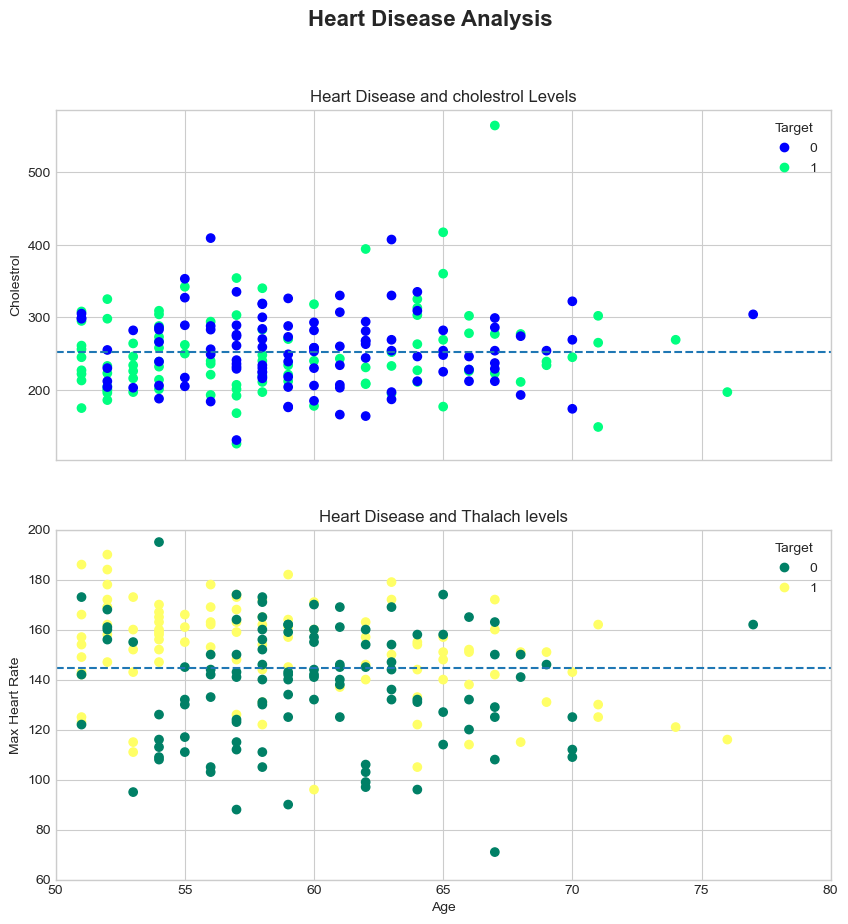

In [190]:
fig